Extracted files:
['.DS_Store', 'bad', 'good', 'masks']
Dataset structure verified. Proceeding to training.
Found 4980 images belonging to 3 classes.
Found 1243 images belonging to 3 classes.


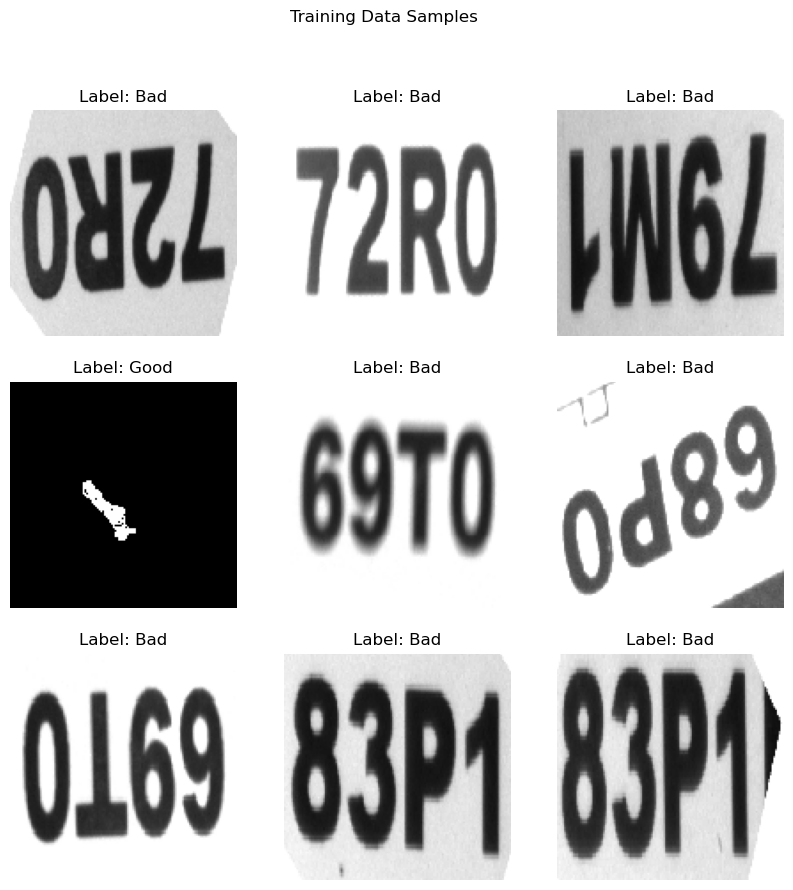

Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


156/156 ━━━━━━━━━━━━━━━━━━━━ 25s 159ms/step - accuracy: 0.6556 - loss: -532709.2500 - val_accuracy: 0.6718 - val_loss: -29306708.0000
Epoch 2/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 24s 152ms/step - accuracy: 0.6788 - loss: -202308176.0000 - val_accuracy: 0.6718 - val_loss: -2082841600.0000
Epoch 3/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 24s 153ms/step - accuracy: 0.6746 - loss: -4729902080.0000 - val_accuracy: 0.6718 - val_loss: -20870895616.0000
Epoch 4/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 25s 159ms/step - accuracy: 0.6704 - loss: -33981734912.0000 - val_accuracy: 0.6718 - val_loss: -97734762496.0000
Epoch 5/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 25s 161ms/step - accuracy: 0.6696 - loss: -137482502144.0000 - val_accuracy: 0.6718 - val_loss: -304827236352.0000
Epoch 6/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 31s 195ms/step - accuracy: 0.6707 - loss: -396678037504.0000 - val_accuracy: 0.6718 - val_loss: -759136518144.0000
Epoch 7/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 27s 169ms/step - accuracy: 0.6721 - loss: -938437902336.0000 

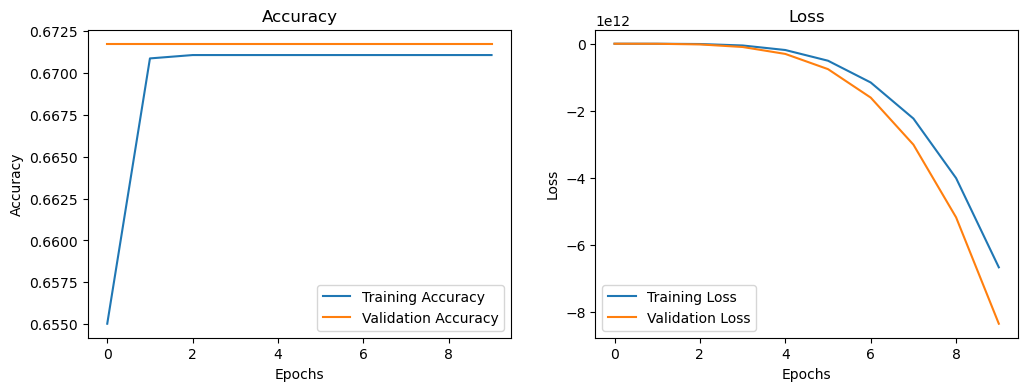

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Prediction for test image: Bad Image


In [2]:
import zipfile
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Step 1: Specify the path of the zipped dataset
zip_file_path = '/Users/rahul.g/Desktop/drive-download-20241201T152444Z-001.zip'  # Dataset path
extract_dir = './dataset'

# Step 2: Extract the zipped dataset
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Verify the dataset structure
print("Extracted files:")
print(os.listdir(extract_dir))

# Ensure directories exist
GOOD_IMAGES_DIR = os.path.join(extract_dir, 'good')
BAD_IMAGES_DIR = os.path.join(extract_dir, 'bad')

if not os.path.exists(GOOD_IMAGES_DIR) or not os.path.exists(BAD_IMAGES_DIR):
    raise FileNotFoundError("Ensure the dataset contains 'good' and 'bad' directories.")
else:
    print("Dataset structure verified. Proceeding to training.")

# Hyperparameters
IMG_SIZE = (128, 128)  # Resize images to 128x128
BATCH_SIZE = 32
EPOCHS = 10

# Data Preparation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 20% of data for validation
)

train_generator = train_datagen.flow_from_directory(
    extract_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training',
    shuffle=True
)

validation_generator = train_datagen.flow_from_directory(
    extract_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation',
    shuffle=True
)

# Visualize some sample images
def plot_samples(generator, title):
    images, labels = next(generator)
    plt.figure(figsize=(10, 10))
    for i in range(9):  # Display 9 images
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(f"Label: {'Bad' if labels[i] == 1 else 'Good'}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

plot_samples(train_generator, "Training Data Samples")

# Model Definition
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Model Training
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=EPOCHS,
    callbacks=[early_stopping]
)

# Visualize Training and Validation Accuracy/Loss
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_training_history(history)

# Save Model
model.save('./scratch_detection_model.h5')

# Testing on a Single Image
def predict_image(img_path):
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    prediction = model.predict(img_array)
    return "Bad Image" if prediction[0] > 0.5 else "Good Image"

# Test Example
test_image_path = os.path.join(BAD_IMAGES_DIR, os.listdir(BAD_IMAGES_DIR)[0])  # Replace with actual test image path if needed
result = predict_image(test_image_path)
print(f"Prediction for test image: {result}")
